In [1]:
import pandas as pd
from datetime import datetime, timedelta
from os import path
import glob
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
date = datetime.today() - timedelta(days = 1)
min_date = datetime(year = 2020, month = 1, day = 22)

data_dir = "data"

while date >= min_date:
    date_formatted = date.strftime("%m-%d-%Y")
    filepath = f"{data_dir}/{date_formatted}.csv"
    if not path.isfile(filepath):    
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_formatted}.csv"
        dataframe = pd.read_csv(url)
        dataframe.to_csv(filepath, index = False)
        print(f"Saved {filepath}")
    else:
        print(f"Skipped {filepath}")
    date = date - timedelta(days = 1)

In [3]:
data_files = glob.glob(f"{data_dir}/*.csv")

daily_dataframes = []
p = re.compile(r'(\d{2}-\d{2}-\d{2})')

for file in data_files:
    daily_dataframe = pd.read_csv(file)
    daily_dataframe = daily_dataframe.rename({"Last_Update": "Last Update", "Country_Region": "Country/Region"}, axis=1)
    daily_dataframe["Last Update"] = p.search(file).group()
    daily_dataframes.append(daily_dataframe)

combined_data = pd.concat(daily_dataframes, axis=0, ignore_index=True, sort=False)
combined_data = combined_data.sort_values(by="Last Update", ascending=False)
combined_data = combined_data.filter(["Country/Region", "Last Update", "Confirmed", "Deaths", "Recovered"], axis=1)
combined_data["Last Update"] = combined_data["Last Update"].apply(lambda x: datetime.strptime(x, "%m-%d-%y"))
combined_data["Country/Region"] = combined_data["Country/Region"].replace("United Kingdom", "UK")
combined_data["Country/Region"] = combined_data["Country/Region"].replace("Mainland China", "China")

In [4]:
countries_selected = ["UK", "Italy"]
filtered_data = combined_data[combined_data["Country/Region"].isin(countries_selected)]
grouped_data = filtered_data.groupby(by=["Last Update", "Country/Region"]).sum()
print(grouped_data.tail(10))

                            Confirmed   Deaths  Recovered
Last Update Country/Region                               
2020-03-28  Italy             92472.0  10023.0    12384.0
            UK                17312.0   1021.0      151.0
2020-03-29  Italy             97689.0  10779.0    13030.0
            UK                19780.0   1231.0      151.0
2020-03-30  Italy            101739.0  11591.0    14620.0
            UK                22453.0   1411.0      171.0
2020-03-31  Italy            105792.0  12428.0    15729.0
            UK                25481.0   1793.0      179.0
2020-04-01  Italy            110574.0  13155.0    16847.0
            UK                29865.0   2357.0      179.0


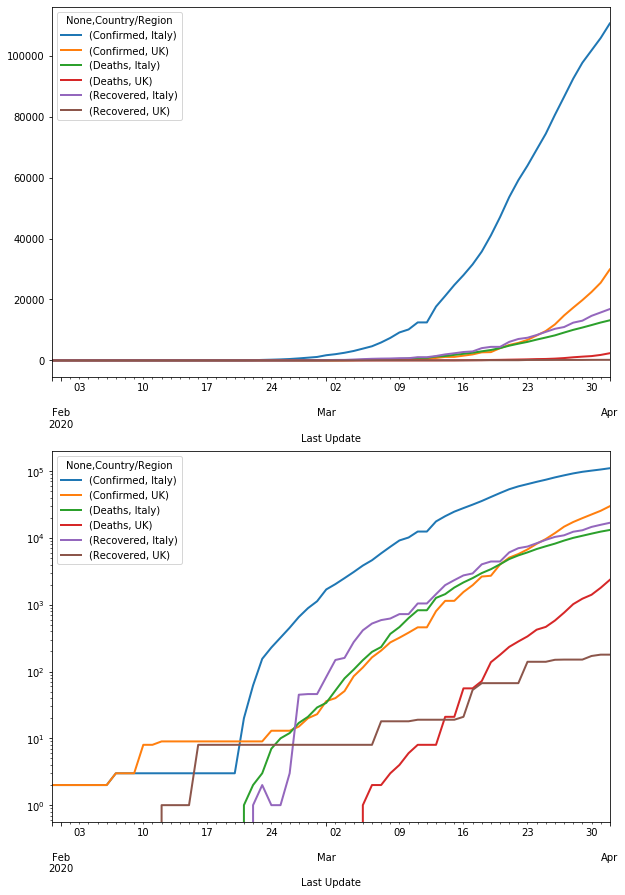

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))
clean_data = grouped_data.unstack()
clean_data.plot(kind="line", ax=ax[0], lw=2)
clean_data.plot(kind="line", ax=ax[1], lw=2)
ax[1].set_yscale("log")